<a href="https://colab.research.google.com/github/antonio2505/SuperDataSience_Projects_DL/blob/main/1_Customer_Churn_with_ANNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
# #1 Churn Modelling Problem

In this part you will be solving a data analytics challenge for a bank. You will be given a dataset with a large sample of the bank's customers. To make this dataset, the bank gathered information such as customer id, credit score, gender, age, tenure, balance, if the customer is active, has a credit card, etc. During a period of 6 months, the bank observed if these customers left or stayed in the bank.

Your goal is to make an Artificial Neural Network that can predict, based on geo-demographical and transactional information given above, if any inpidual customer will leave the bank or stay (customer churn). Besides, you are asked to rank all the customers of the bank, based on their probability of leaving. To do that, you will need to use the right Deep Learning model, one that is based on a probabilistic approach.

If you succeed in this project, you will create significant added value to the bank. By applying your Deep Learning model the bank may significantly reduce customer churn.

**Predict** if the Customer will or not the Bank

## PART #1: DATA PREPROCESSING

## IMPORT LIBRARIES

In [1]:
#!pip install theano

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# IMPORT THE DATASET

In [3]:
#from google.colab import files
#file = files.upload()

In [4]:
dataset = pd.read_csv('Churn_Modelling.csv')


In [5]:
dataset.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [6]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
dataset['Gender'] = dataset['Gender'].apply(lambda x:1 if x=='Female' else 0)

In [8]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,0,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,0,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,1,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,0,42,3,75075.31,2,1,0,92888.52,1


In [9]:
x = dataset.iloc[:, 3: 13].values
y = dataset.iloc[:, 13].values


In [10]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [11]:
x

array([[619, 'France', 1, ..., 1, 1, 101348.88],
       [608, 'Spain', 1, ..., 0, 1, 112542.58],
       [502, 'France', 1, ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 1, ..., 0, 1, 42085.58],
       [772, 'Germany', 0, ..., 1, 0, 92888.52],
       [792, 'France', 1, ..., 1, 0, 38190.78]], dtype=object)

## Encoding the Categorical Data

In [12]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [13]:
print(x)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


# Splitting the dataset into the Training set and Test set

In [14]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [15]:
x_train.shape

(8000, 12)

In [16]:
x_test.shape

(2000, 12)

# Feature Scaling

In [17]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# PART #2: MAKE THE ANNs

## Importing the keras libraries and Packages

In [18]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

## Training the ANNs

In [19]:
#initializing the ANNs
classifier = Sequential()

In [20]:
#Adding the Input Layer and the first Hidden Layer
# rectifier for the hidden layer
# sigmoid for the output layer
classifier.add(Dense(12, activation='relu', kernel_initializer='uniform'))
#classifier.add(Dropout(p= 0.1))

In [21]:
#Adding the second Layer
classifier.add(Dense(12, activation='relu', kernel_initializer='uniform'))
#classifier.add(Dropout(p= 0.1))

In [22]:
#Adding the Final Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='uniform'))

In [23]:
#compile the ANNs 
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Fitting the ANNs to the Training set

In [24]:
classifier.fit(x_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
800/800 [==============================] - 20s 876us/step - loss: 0.5382 - accuracy: 0.7953
Epoch 2/100
800/800 [==============================] - 1s 866us/step - loss: 0.4200 - accuracy: 0.7990
Epoch 3/100
800/800 [==============================] - 1s 893us/step - loss: 0.4078 - accuracy: 0.8332
Epoch 4/100
800/800 [==============================] - 1s 883us/step - loss: 0.4042 - accuracy: 0.8374
Epoch 5/100
800/800 [==============================] - 1s 866us/step - loss: 0.4151 - accuracy: 0.8279
Epoch 6/100
800/800 [==============================] - 1s 853us/step - loss: 0.4003 - accuracy: 0.8337
Epoch 7/100
800/800 [==============================] - 1s 830us/step - loss: 0.3965 - accuracy: 0.8387
Epoch 8/100
800/800 [==============================] - 1s 857us/step - loss: 0.4028 - accuracy: 0.8346
Epoch 9/100
800/800 [==============================] - 1s 821us/step - loss: 0.3982 - accuracy: 0.8334
Epoch 10/100
800/800 [==============================] - 1s 901us/step - 

# PART #3 : MAKING THE PREDICTION AND EVALUATE THE MODEL

# Predicting the Test set *results*

In [25]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [26]:
y_pred

array([[0.3255089 ],
       [0.36211276],
       [0.08089092],
       ...,
       [0.11903554],
       [0.3302629 ],
       [0.17892978]], dtype=float32)

In [28]:
#convert the probability in 0 and 1 form to make the confusion metric
y_pred = (y_pred > 0.5)

In [29]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

# Making the Confusion Matrix

In [30]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [31]:
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report


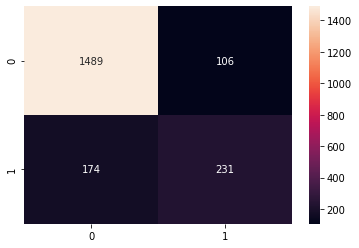

In [32]:
sns.heatmap(cm, annot=True, fmt='d')

In [33]:
accuracy_score(y_test, y_pred)

0.86

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1595
           1       0.69      0.57      0.62       405

    accuracy                           0.86      2000
   macro avg       0.79      0.75      0.77      2000
weighted avg       0.85      0.86      0.86      2000



In [35]:
y_predict = classifier.predict(sc.transform(np.array([[1.0, 0.0, 0.0, 600,0,40,3,60000,2,1,1,50000]])))

In [36]:
#y = 1 customer leave the bank
#y = 0 customer does not leave the bank
y_predict = (y_predict > 0.5) # the prediction < 0.5 the customer desnt leave the Bank 

In [37]:
y_predict

array([[False]])

# PART #4 : EVALUATING, IMPROVING AND TUNING THE MODEL

## Evaluating the ANNs

In [ ]:
#from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
#from keras.wrappers.scikit_learn import KerasClassifier
#from sklearn.model_selection import cross_val_score

#def buildclassifier():
  #classifier = Sequential()
  #classifier.add(Dense(12, activation='relu', kernel_initializer='uniform'))
  #classifier.add(Dense(12, activation='relu', kernel_initializer='uniform'))
  #classifier.add(Dense(1, activation='sigmoid', kernel_initializer='uniform'))
  #classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
 # return classifier */
#Sclassifier = KerasClassifier(build_fn=buildclassifier, batch_size=10, epochs=100)
#accuracies = cross_val_score(estimator = classifier, X=x_train, y= y_train, cv = 10, n_jobs = -1)


In [ ]:
#mean = accuracies.mean()  # to see the mean of the prediction
#variance = accuracies.std() # to see the variance of the overfitting (low or high)

## Improving the ANNs

In [ ]:
#from keras.layers import Dropout

## Tuning the ANNs

In [ ]:

# Tuning the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25, 32],
              'epochs': [100, 500],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_